# Figure 3(a): Input Modality use

In [118]:
import pandas as pd
import plotly.express as px
import numpy as np

In [119]:
df = pd.read_csv("data/modalities_per_action.csv")
df.head()

,modality,person,subtask
0,Speech,P3,search
1,Touch,P4,open document
2,Touch,P4,move document
3,Touch,P4,move document
4,Touch,P4,move document


In [120]:
# Capitalize the first letter of the actions
df["subtask"] = df["subtask"].str.capitalize()
df.head()

,modality,person,subtask
0,Speech,P3,Search
1,Touch,P4,Open document
2,Touch,P4,Move document
3,Touch,P4,Move document
4,Touch,P4,Move document


In [121]:
# Improve wording
df["subtask"] = df["subtask"].str.replace('Move selected docs','Move selected')
df["subtask"] = df["subtask"].str.replace('Select tagged','Select per tag')
df["subtask"] = df["subtask"].str.replace('Scroll','Navigate in document')

In [122]:
fontsize_sub = 19

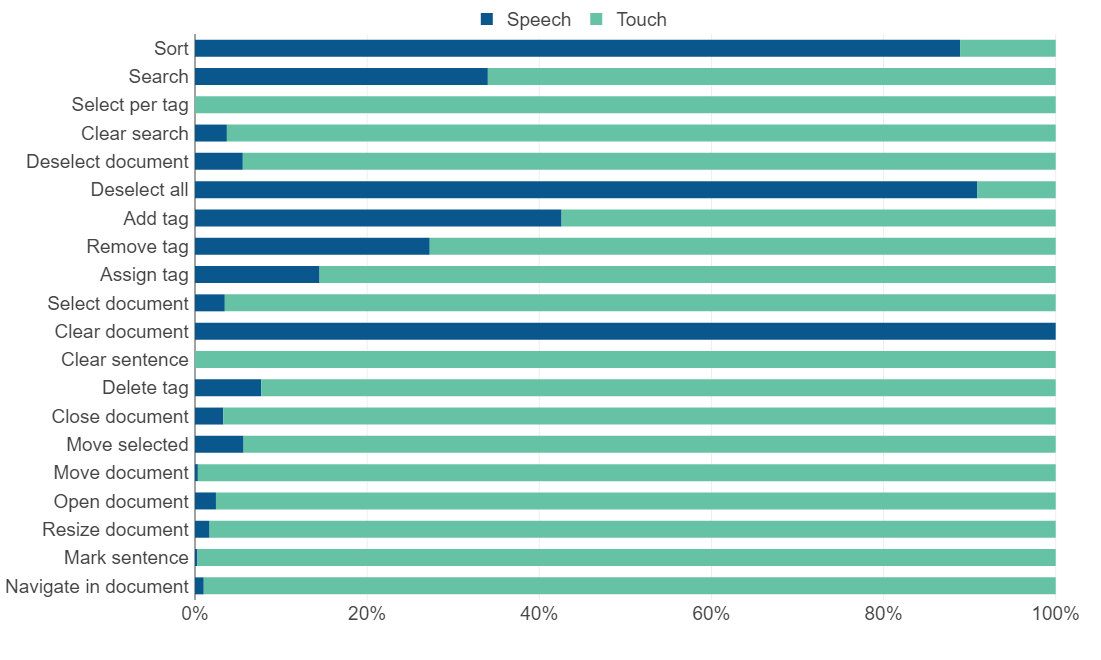

In [123]:
fig3a = px.histogram(df, y="subtask", template="none", height=660, color="modality", width = 960,
             title="Distribution across tasks", barnorm="percent",
             color_discrete_map={
                "Speech": "#0A578D", 
                "Touch": "#66C2A4"
             },)

# Customize font and legend orientation & position
fig3a.update_yaxes(categoryorder='array', ticksuffix = " ",
                        categoryarray= ["Navigate in document", "Mark sentence", "Resize document", "Open document", 
                                        "Move document", "Move selected", "Close document", 
                                        "Delete tag", "Clear sentence", "Clear document", 
                                        "Select document", "Assign tag", "Remove tag", "Add tag",
                                        "Deselect all", "Deselect document", "Clear search", 
                                        "Select per tag", "Search", "Sort"
                                        ],
                       tickfont=dict(family='Arial', size=fontsize_sub), title='')
fig3a.update_xaxes(ticksuffix = '%', 
                       title=''
                      )

fig3a.update_layout(title="", bargap=0.4,
    font_family="Arial", font_size=fontsize_sub,
    legend=dict(title='', x=0.3, y= 1.06, 
        font=dict(family="Arial", size = fontsize_sub),
        orientation = 'h'),
    margin=dict(l=195, r=0, b=60, t=15)
)

fig3a.write_image("fig3a-modality-use.pdf")
fig3a.show()

# Figure 3(b): Input Modality preferences

In [124]:
pf = pd.read_csv("data/post-modality-preferences.csv")
pf.head()

,participant,task,preference
0,P1,open,Touch
1,P1,close,Touch
2,P1,select,Touch
3,P1,deselect,Touch
4,P1,sort,Touch


In [125]:
# Capitalize the first letter of the action categories
pf["task"] = pf["task"].str.capitalize()

In [126]:
# Improve wording
pf["task"] = pf["task"].str.replace('Assigntag','Assign tag')
pf["task"] = pf["task"].str.replace('Removetag','Remove tag')
pf["task"] = pf["task"].str.replace('Selecttag','Select per tag')
pf["task"] = pf["task"].str.replace('Addtag','Add tag')
pf["task"] = pf["task"].str.replace('Deletetag','Delete tag')
pf["task"] = pf["task"].str.replace('Clearsearch','Clear search')
pf["task"] = pf["task"].str.replace('Scroll', 'Navigate')

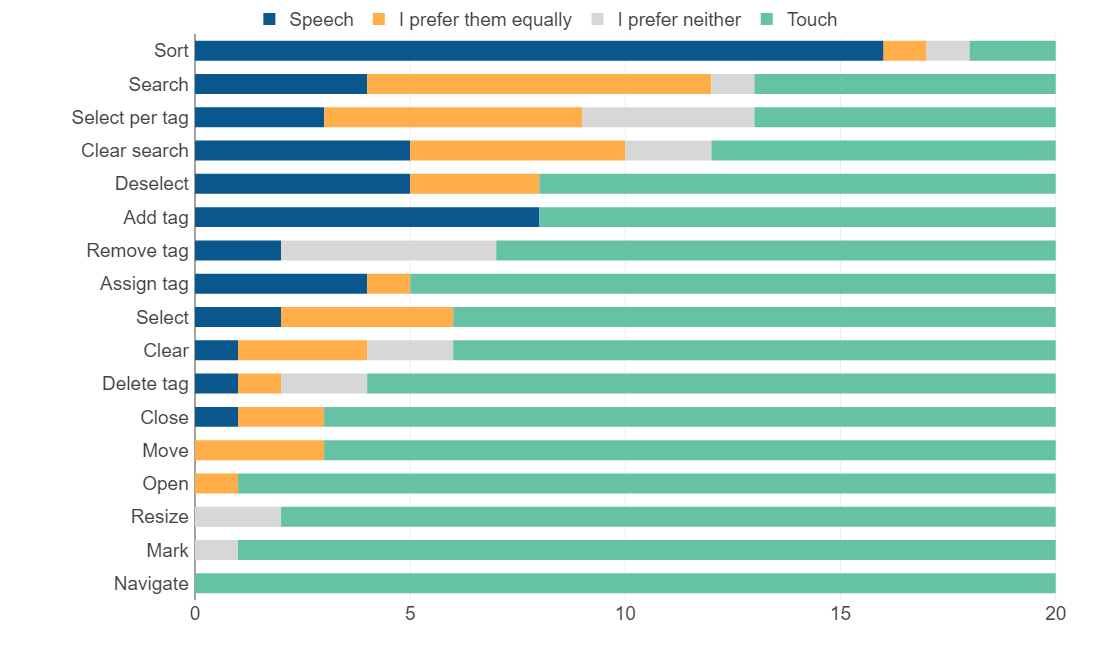

In [127]:
fig3b = px.histogram(pf, y='task',
             height = 660,
             width = 960,
             color='preference',
             color_discrete_map={
                "Speech": "#0A578D",
                "Touch": "#66C2A4",
                "I prefer neither": "#D7D7D7",
                "I prefer them equally": "#FFAE49", 
             },
             template = 'none',
             category_orders=dict(preference=["Speech", "I prefer them equally", "I prefer neither", "Touch"])
            )

fig3b.update_yaxes(categoryorder='array', ticksuffix = " ",
                      categoryarray= ["Navigate", "Mark", "Resize", "Open","Move",
                                      "Close", "Delete tag", "Clear","Select", "Assign tag", "Remove tag", 
                                      "Add tag", "Deselect", "Clear search", "Select per tag", "Search", "Sort"],
                       tickfont=dict(family='Arial', size=fontsize_sub), title='')

fig3b.update_xaxes(tickfont=dict(family='Arial', size=fontsize_sub), title="")

fig3b.update_layout(title="", bargap=0.4,
    font_family="Arial", font_size=fontsize_sub,
    legend=dict(title='', x=0.06, y= 1.06, 
        font=dict(family="Arial", size = fontsize_sub),
        orientation = 'h'),
    margin=dict(l=195, r=0, b=60, t=15)
)

fig3b.write_image("fig3b-modality-preferences.pdf")
fig3b.show()